# Data

## Saturday 8:30 to 9:30 PM Demands:
- **2018** - 24/03
- **2019** - 30/03
- **2020** - 28/03
- **2021** - 27/03
- **2022** - 26/03

# Objectives

1. **Average Demand Calculation:**
   - Find the average demand between 8:30 to 9:30 PM of all Saturdays in February, March, April, excluding this Saturday.

2. **Comparison of This Saturday's Average Demand to Feb, Mar, Apr Averages:**
   - Calculate the ratio of this Saturday's average demand to the average demand in February, March, April for each year separately.

3. **Statistical Analysis:**
   - Compute the standard deviation.
   - Perform a two-tailed test for the p-value for each of the five years to determine statistical significance.

# Methodology (More Robust Way)

For Each Year:
1. Consider all Saturdays.
2. Deseasonalize the demand data with monthly seasonality.
3. Calculate the ratio.

# Pending Tasks (Not Now)

- Compare impacts on demand for several countries.
- Conduct social media analysis for 2 weeks before posts mentioning Earth Hour.

## 2018

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Yearly Energy Demand Data/System Demand (Actual)/2018.xlsx', index_col=0)
df.columns = pd.to_datetime(df.columns, dayfirst=True)
df.head()

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06
Time,,,,,,,,,,,,,,,,,,,,,
00:30,5070.812874,5014.578340,5157.434793,5266.844708,5269.405547,5335.362020,5362.584695,5174.635548,5360.443999,5323.443737,...,5594.688889,5706.938068,5578.180305,5495.299484,5390.080627,5407.712538,5768.587360,5794.985765,5844.527554,5740.252239
01:00,5037.987630,4926.031018,5064.851155,5173.717288,5157.845567,5219.521755,5273.403194,5083.963517,5242.737184,5201.357085,...,5485.951995,5607.640551,5458.104928,5384.946233,5346.603978,5308.024994,5614.518459,5667.121559,5731.865711,5617.292546
01:30,5000.777586,4823.504766,4966.995131,5078.492592,5076.610474,5141.324917,5161.711858,4997.272617,5167.088782,5120.539666,...,5383.025141,5511.212304,5374.490900,5308.423103,5319.246060,5221.686514,5532.785534,5591.786622,5623.089960,5538.063337
02:00,4952.383297,4774.241679,4909.499808,5032.548460,5010.367210,5062.856758,5090.056933,4938.754291,5104.429305,5051.988309,...,5298.341865,5431.331114,5291.207078,5228.946684,5268.205901,5151.138926,5451.185260,5503.167164,5557.930067,5461.786908
02:30,4872.322770,4722.382602,4869.915368,4964.212149,4971.231798,4997.938668,5035.514689,4890.860645,5035.129472,5004.135541,...,5246.430650,5354.062016,5215.472177,5173.183558,5187.094496,5093.966267,5403.402333,5437.925584,5468.929783,5387.927983


In [65]:
saturdays = {}
earthhour = sum(df['2018-03-24 00:00:00']['21:00':'21:30'])
for i in df.columns:
    if i.month in {2,3,4} and i.weekday() == 5:
        saturdays[i] = sum(df[i]['21:00':'21:30'])

saturdays = pd.Series(saturdays)

In [66]:
print('Ratio of Earth Hour 2018 to Average Saturday: ', earthhour/saturdays.drop('2018-03-24 00:00:00').mean())

Ratio of Earth Hour 2018 to Average Saturday:  1.0245595365371987


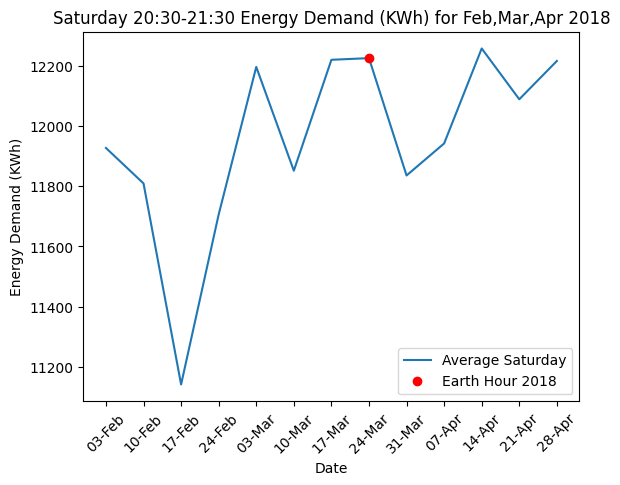

In [67]:
plt.title('Saturday 20:30-21:30 Energy Demand (KWh) for Feb,Mar,Apr 2018')
plt.xlabel('Date')
plt.ylabel('Energy Demand (KWh)')
plt.plot(saturdays.keys().strftime('%d-%b'),saturdays.values, label='Average Saturday')
plt.plot('24-Mar',earthhour, 'ro', label='Earth Hour 2018')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 2019

In [69]:
df = pd.read_excel('Yearly Energy Demand Data/System Demand (Actual)/2019.xlsx', index_col=0)
df.columns = pd.to_datetime(df.columns, dayfirst=True)

saturdays = {}
earthhour = sum(df['2019-03-30 00:00:00']['21:00':'21:30'])
for i in df.columns:
    if i.month in {2,3,4} and i.weekday() == 5:
        saturdays[i] = sum(df[i]['21:00':'21:30'])

saturdays = pd.Series(saturdays)

In [70]:
print('Ratio of Earth Hour 2019 to Average Saturday: ', earthhour/saturdays.drop('2019-03-30 00:00:00').mean())

Ratio of Earth Hour 2019 to Average Saturday:  0.9919287106266845


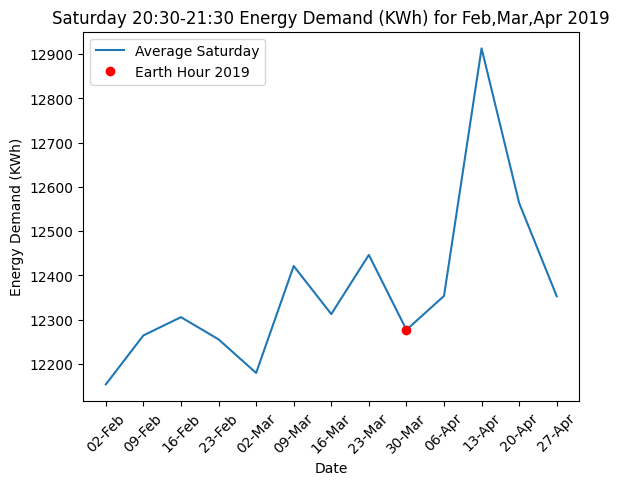

In [71]:
plt.title('Saturday 20:30-21:30 Energy Demand (KWh) for Feb,Mar,Apr 2019')
plt.xlabel('Date')
plt.ylabel('Energy Demand (KWh)')
plt.plot(saturdays.keys().strftime('%d-%b'),saturdays.values, label='Average Saturday')
plt.plot('30-Mar',earthhour, 'ro', label='Earth Hour 2019')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 2020

In [74]:
df = pd.read_excel('Yearly Energy Demand Data/System Demand (Actual)/2020.xlsx', index_col=0)
df.columns = pd.to_datetime(df.columns, dayfirst=True)

saturdays = {}
earthhour = sum(df['2020-03-28 00:00:00']['21:00':'21:30'])
for i in df.columns:
    if i.month in {2,3,4} and i.weekday() == 5:
        saturdays[i] = sum(df[i]['21:00':'21:30'])

saturdays = pd.Series(saturdays)

In [76]:
print('Ratio of Earth Hour 2020 to Average Saturday: ', earthhour/saturdays.drop('2020-03-28 00:00:00').mean())

Ratio of Earth Hour 2020 to Average Saturday:  1.00752020213876


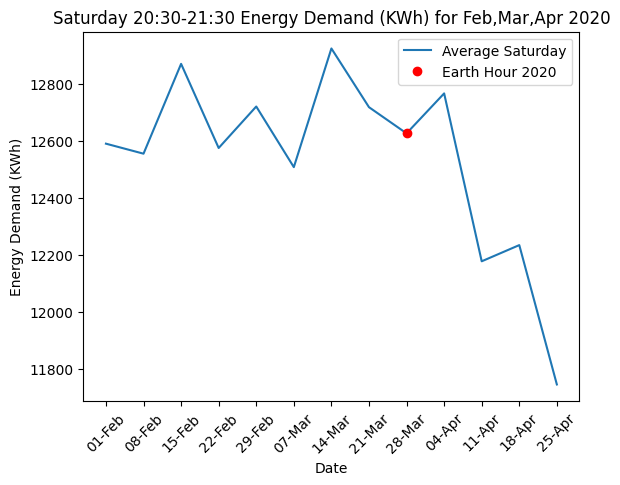

In [77]:
plt.title('Saturday 20:30-21:30 Energy Demand (KWh) for Feb,Mar,Apr 2020')
plt.xlabel('Date')
plt.ylabel('Energy Demand (KWh)')
plt.plot(saturdays.keys().strftime('%d-%b'),saturdays.values, label='Average Saturday')
plt.plot('28-Mar',earthhour, 'ro', label='Earth Hour 2020')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 2021

Ratio of Earth Hour 2021 to Average Saturday:  0.9835619365440706


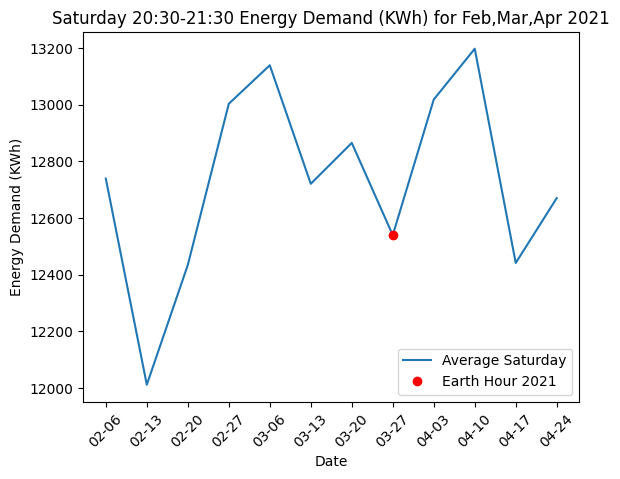

In [80]:
from utils import *

earthhour(2021)

## 2022

Ratio of Earth Hour 2022 to Average Saturday:  1.0030395589665566


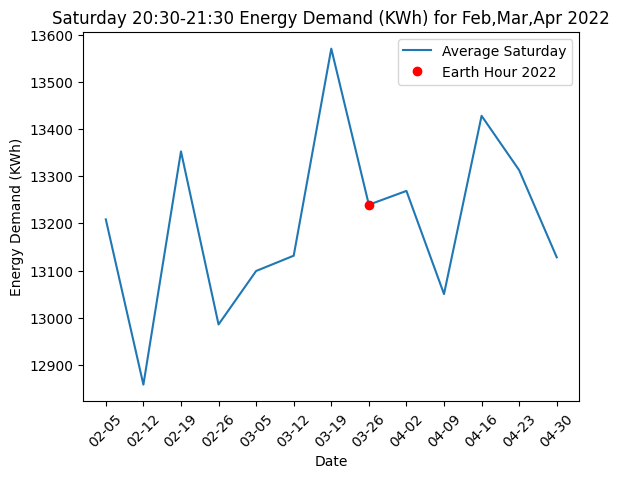

In [81]:
earthhour(2022)

# Saving Results

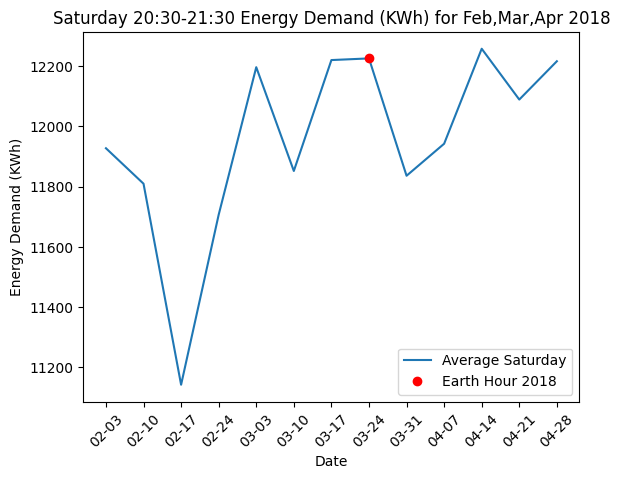

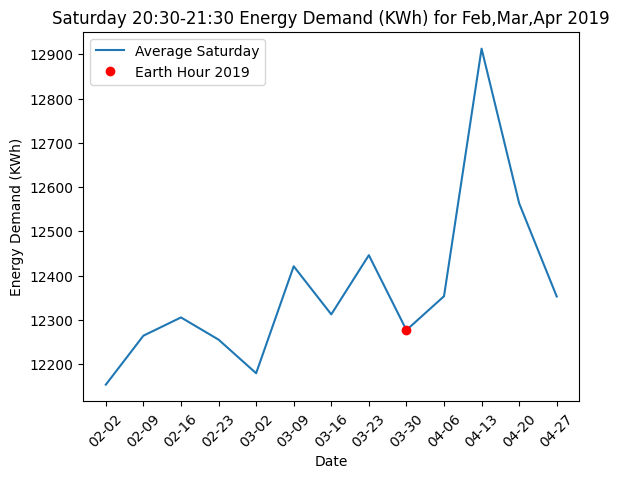

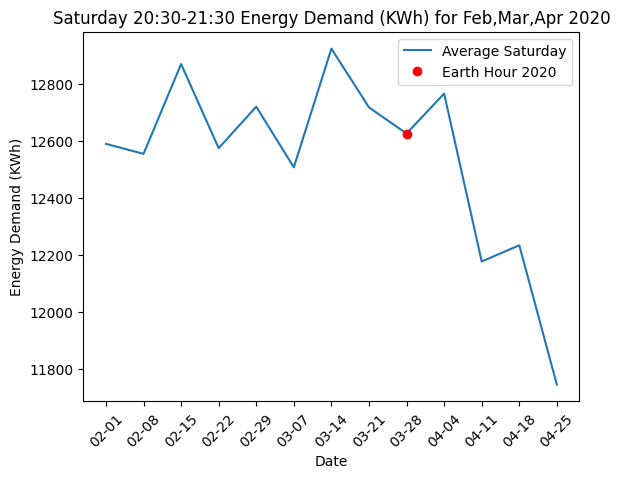

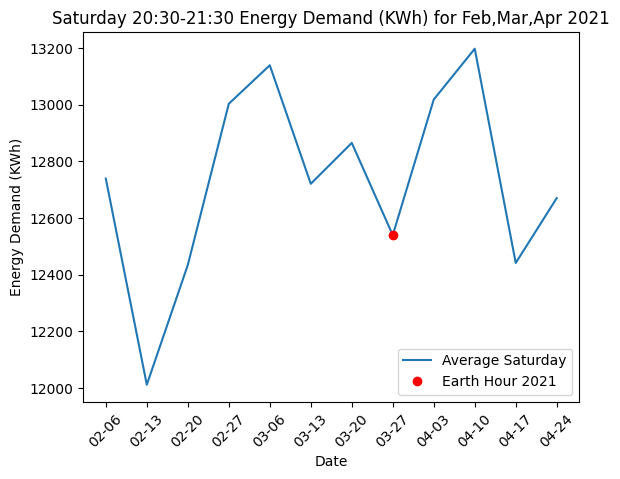

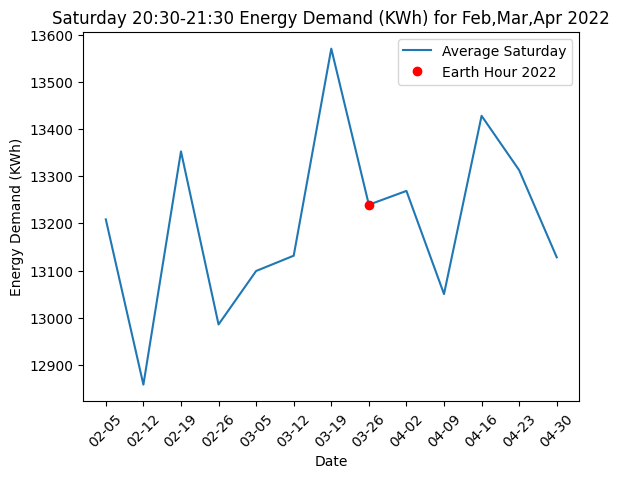

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

earthhours = {2018:'03-24', 2019:'03-30', 2020:'03-28', 2021:'03-27', 2022:'03-26'}
def earthhour(year):
    df = pd.read_excel('Yearly Energy Demand Data/System Demand (Actual)/'+str(year)+'.xlsx', index_col=0)
    df.columns = pd.to_datetime(df.columns, dayfirst=True)
    earthhour = sum(df[str(year)+f'-{earthhours[year]} 00:00:00']['21:00':'21:30'])
    saturdays = {}
    for i in df.columns:
        if i.month in {2,3,4} and i.weekday() == 5:
            saturdays[i] = sum(df[i]['21:00':'21:30'])
    saturdays = pd.Series(saturdays)
    
    plt.figure()
    plt.title('Saturday 20:30-21:30 Energy Demand (KWh) for Feb,Mar,Apr '+str(year))
    plt.xlabel('Date')
    plt.ylabel('Energy Demand (KWh)')
    plt.plot(saturdays.keys().strftime('%m-%d'),saturdays.values, label='Average Saturday')
    plt.plot(earthhours[year],earthhour, 'ro', label='Earth Hour '+str(year))
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig('FebMarAprSaturdays'+str(year)+'.png')

earthhour(2018)
earthhour(2019)
earthhour(2020)
earthhour(2021)
earthhour(2022)

Ratio of Earth Hour 2018 to Average Saturday:  1.0245595365371987  
Ratio of Earth Hour 2019 to Average Saturday:  0.9919287106266845  
Ratio of Earth Hour 2020 to Average Saturday:  1.00752020213876  
Ratio of Earth Hour 2021 to Average Saturday:  0.9835619365440706  
Ratio of Earth Hour 2022 to Average Saturday:  1.0030395589665566  